In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
batch_size = 128
img_height = 256
img_width = 256

In [3]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset_new/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'dataset_new/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [4]:
class_names = training_ds.class_names

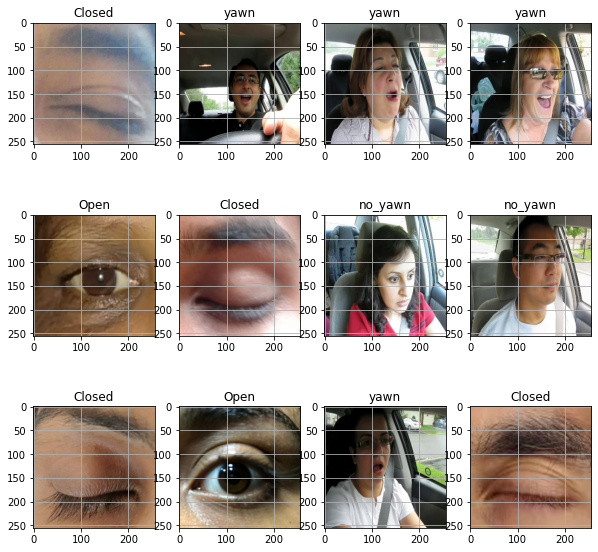

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [6]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [8]:
resnet = ResNet50(input_shape=[256,256] +[3], weights='imagenet', include_top=False)

In [9]:
for layer in resnet.layers:
    layer.trainable = False

In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

In [11]:
x = Flatten()(resnet.output)

In [12]:

prediction = Dense(len("dataset_new/train"), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
res=model.fit(training_ds, validation_data= testing_ds, epochs = 10)

Epoch 1/10
20/20 [==============================] - 197s 10s/step - loss: 3.7484 - accuracy: 0.7937 - val_loss: 2.2293 - val_accuracy: 0.8891
Epoch 2/10
20/20 [==============================] - 201s 10s/step - loss: 0.4852 - accuracy: 0.9603 - val_loss: 0.3067 - val_accuracy: 0.9746
Epoch 3/10
20/20 [==============================] - 189s 9s/step - loss: 0.3729 - accuracy: 0.9745 - val_loss: 0.3527 - val_accuracy: 0.9746
Epoch 4/10
20/20 [==============================] - 184s 9s/step - loss: 0.1128 - accuracy: 0.9891 - val_loss: 0.3092 - val_accuracy: 0.9792
Epoch 5/10
20/20 [==============================] - 183s 9s/step - loss: 0.0705 - accuracy: 0.9927 - val_loss: 0.5266 - val_accuracy: 0.9838
Epoch 6/10
20/20 [==============================] - 179s 9s/step - loss: 0.0139 - accuracy: 0.9976 - val_loss: 0.3063 - val_accuracy: 0.9861
Epoch 7/10
20/20 [==============================] - 176s 9s/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 0.2210 - val_accuracy: 0.9815
Epoch 8/10


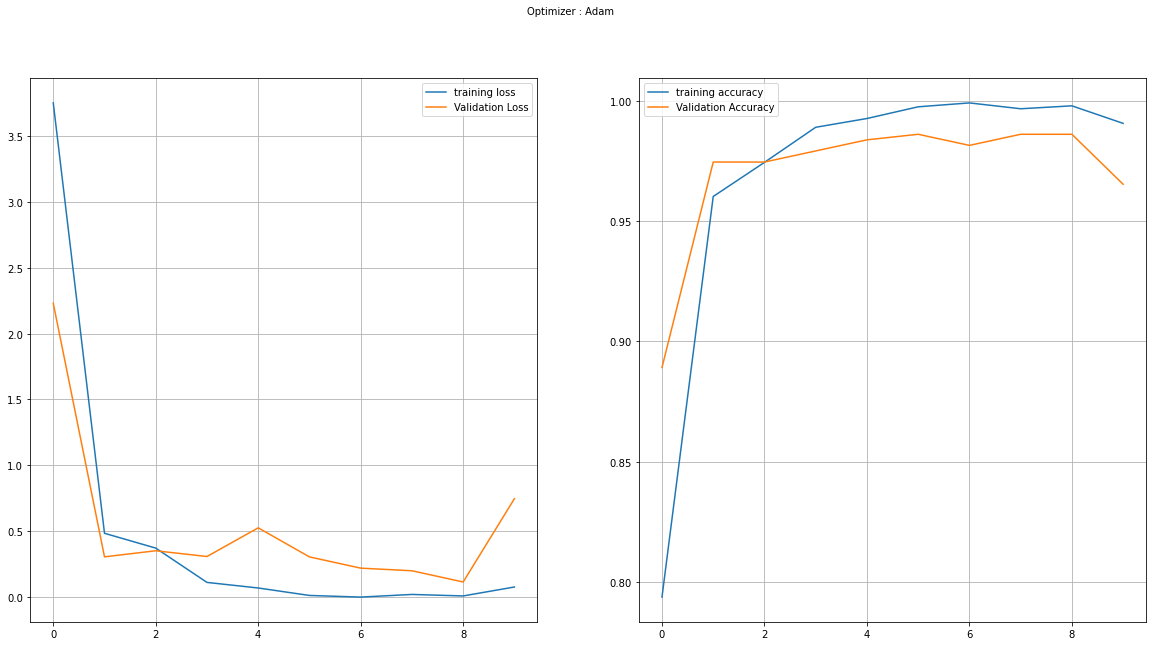

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.plot(res.history['loss'], label = 'training loss')
plt.plot(res.history['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(res.history['accuracy'], label = 'training accuracy')
plt.plot(res.history['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

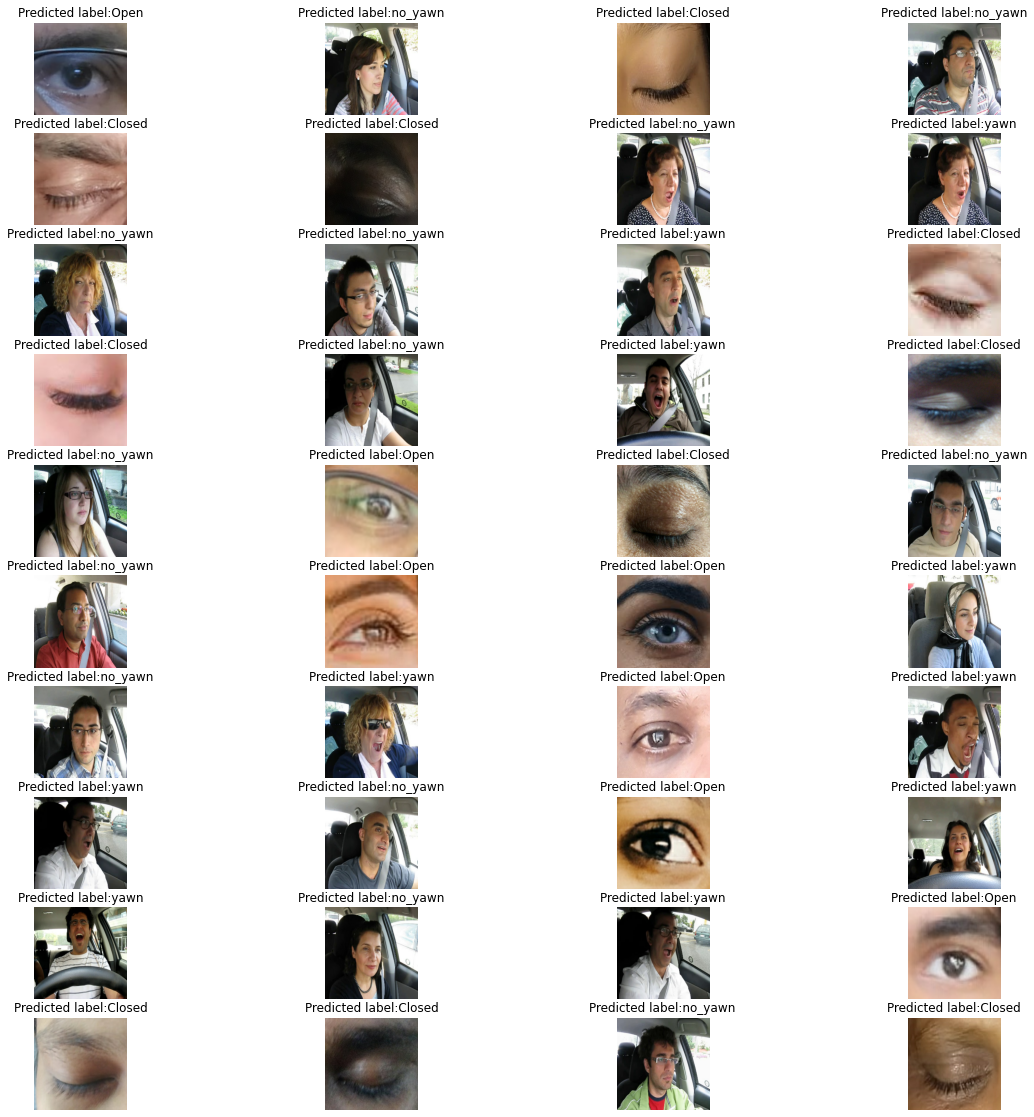

In [17]:
import numpy as np 
import pandas as pd 


plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = model.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)

In [190]:
img = cv2.imread(r'test/man1.png')

In [191]:
faceCascade = cv2.CascadeClassifier(r"C:\Users\sachi\AppData\Local\Programs\Python\Python310\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier(r"C:\Users\sachi\AppData\Local\Programs\Python\Python310\Lib\site-packages\cv2\data\haarcascade_eye.xml")

In [192]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [193]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

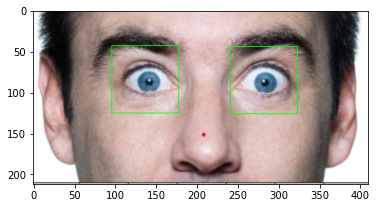

In [194]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [195]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected or Closed")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

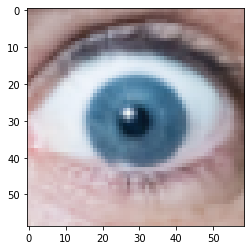

In [196]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [197]:
final_img = cv2.resize(eyes_roi, (256,256))
final_img = np.expand_dims(final_img, axis=0)
data = np.array(final_img)
result = model.predict(data)

In [198]:
for mem in result:
    print(class_names[np.argmax(mem)])

Open


In [199]:
img = cv2.imread(r'test/closed_girl.jpg')

In [200]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [201]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

In [202]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected or closed")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

eyes not detected
eyes not detected
eyes not detected


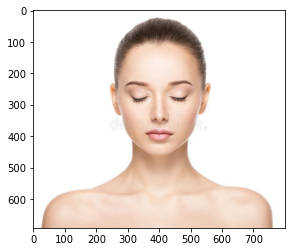

In [224]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))